In [3]:
#import everything necessary for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../helpers/')

from data import Database
from utils import Helpers

In [4]:
db = Database(host="localhost", database="telecom", user="postgres", password="heisenberg")
df = db.read_table_to_dataframe('xdr_data')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,7.349883e+18,4/23/2019 13:56,642.0,4/25/2019 2:06,53.0,130220.0,2.082003e+14,3.368112e+10,3.572961e+13,T10006B,...,21500768.0,12101768.0,12226975.0,16511157.0,340225685.0,6951608.0,483022848.0,13524725.0,50864502.0,388912579.0
1,1.311448e+19,4/23/2019 14:00,501.0,4/24/2019 23:17,453.0,119804.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,7277265.0,14808877.0,5404356.0,17848389.0,281827903.0,3255023.0,746150700.0,1475289.0,38549811.0,305633791.0
2,1.311448e+19,4/23/2019 14:00,507.0,4/24/2019 23:17,453.0,119781.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,10232699.0,8551438.0,8528398.0,19632728.0,73444975.0,8167950.0,787793727.0,10773216.0,49161715.0,105009018.0
3,1.311448e+19,4/23/2019 14:00,744.0,4/25/2019 0:24,330.0,123787.0,2.082017e+14,3.362404e+10,8.629340e+13,D21059A,...,15007252.0,16673992.0,14089357.0,6924105.0,174894914.0,41507.0,345556220.0,837674.0,28422142.0,209975300.0
4,1.311448e+19,4/23/2019 14:01,369.0,4/25/2019 4:13,905.0,137523.0,2.082017e+14,3.366612e+10,3.538111e+13,D42243B,...,9633967.0,17836471.0,22432445.0,11400.0,623985913.0,10539036.0,706817241.0,11317378.0,43951635.0,661274286.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [7]:
def percent_missing(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [8]:
percent_missing(df)

The dataset contains 12.5 % missing values.


In [9]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
percent_missing(df['Nb of sec with 6250B < Vol UL < 37500B'])

The dataset contains 74.56 % missing values.


In [11]:
df['Handset Manufacturer'].unique()

array(['Apple', 'undefined', 'Samsung', 'Huawei', 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', None, 'Zte',
       'Wiko Global Sasu', 'Zebra Technologies Corp.', 'Nokia', 'Wiko',
       'Tcl Communication Ltd', 'ZTE', 'Lenovo', 'Asustek',
       'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'TP-Link Technologies Co Ltd', 'Tp-Link Technologies Co Ltd',
       'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Sonaki Corporation S.A.', 'New-Bu

In [12]:
df['Handset Type'].describe()

count               149429
unique                1396
top       Huawei B528S-23A
freq                 19752
Name: Handset Type, dtype: object

In [13]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [14]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [15]:
top_3_manufacturers_list = top_3_manufacturers.index.tolist()
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_3_manufacturers_list)]

# Group by Manufacturer and Handset Type and count occurrences
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Sort the values and get top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.sort_values(by=['Handset Manufacturer', 'Count'], ascending=[True, False])
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby('Handset Manufacturer').head(5)
top_5_handsets_per_manufacturer

,Handset Manufacturer,Handset Type,Count
35,Apple,Apple iPhone 6S (A1688),9419
31,Apple,Apple iPhone 6 (A1586),9023
41,Apple,Apple iPhone 7 (A1778),6326
55,Apple,Apple iPhone Se (A1723),5187
48,Apple,Apple iPhone 8 (A1905),4993
83,Huawei,Huawei B528S-23A,19752
104,Huawei,Huawei E5180,2079
183,Huawei,Huawei P20 Lite Huawei Nova 3E,2021
182,Huawei,Huawei P20,1480
224,Huawei,Huawei Y6 2018,997


In [16]:
user_data = df.groupby('MSISDN/Number')
user_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,7.349883e+18,4/23/2019 13:56,642.0,4/25/2019 2:06,53.0,130220.0,2.082003e+14,3.368112e+10,3.572961e+13,T10006B,...,21500768.0,12101768.0,12226975.0,16511157.0,340225685.0,6951608.0,483022848.0,13524725.0,50864502.0,388912579.0
1,1.311448e+19,4/23/2019 14:00,501.0,4/24/2019 23:17,453.0,119804.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,7277265.0,14808877.0,5404356.0,17848389.0,281827903.0,3255023.0,746150700.0,1475289.0,38549811.0,305633791.0
2,1.311448e+19,4/23/2019 14:00,507.0,4/24/2019 23:17,453.0,119781.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,10232699.0,8551438.0,8528398.0,19632728.0,73444975.0,8167950.0,787793727.0,10773216.0,49161715.0,105009018.0
3,1.311448e+19,4/23/2019 14:00,744.0,4/25/2019 0:24,330.0,123787.0,2.082017e+14,3.362404e+10,8.629340e+13,D21059A,...,15007252.0,16673992.0,14089357.0,6924105.0,174894914.0,41507.0,345556220.0,837674.0,28422142.0,209975300.0
4,1.311448e+19,4/23/2019 14:01,369.0,4/25/2019 4:13,905.0,137523.0,2.082017e+14,3.366612e+10,3.538111e+13,D42243B,...,9633967.0,17836471.0,22432445.0,11400.0,623985913.0,10539036.0,706817241.0,11317378.0,43951635.0,661274286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.311448e+19,4/23/2019 13:30,944.0,4/25/2019 0:01,561.0,124277.0,2.082022e+14,3.376271e+10,3.531181e+13,L73529B,...,13344653.0,21481781.0,3006429.0,14228011.0,800328990.0,15803103.0,753652429.0,9937191.0,63286610.0,826228019.0
149996,7.349883e+18,4/23/2019 13:40,440.0,4/25/2019 0:05,938.0,123929.0,2.082015e+14,3.361314e+10,3.554291e+13,T85898A,...,12605777.0,16906484.0,22432971.0,9568595.0,393607235.0,13856748.0,799604859.0,4582819.0,49546620.0,438336637.0
149998,7.349883e+18,4/23/2019 13:45,396.0,4/25/2019 5:04,563.0,141562.0,2.082003e+14,3.366454e+10,3.583681e+13,D14160B,...,21085496.0,2408552.0,20268785.0,9387413.0,93762508.0,12419669.0,431730550.0,15736147.0,42056744.0,146178340.0
149999,7.349883e+18,4/23/2019 13:45,371.0,4/25/2019 0:45,801.0,125968.0,2.082014e+14,3.362153e+10,8.655450e+13,D17564A,...,17936069.0,21870886.0,8441175.0,12359191.0,531253798.0,5304546.0,249852131.0,15946681.0,58471297.0,573991554.0


In [17]:
#Number of XDR Sessions per user

num_xdr = user_data.size().rename('Number of XDR Sessions')
session_duration = user_data['Dur. (ms)'].sum() / 1000
total_up_dl_per_user = user_data[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

In [46]:
#total data volume for each user per application 

app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

for data in app_columns:
    df[data] /= (1024 * 1024)
total_data = user_data[app_columns].sum()

In [19]:
#user behavior 

user_behavior = pd.concat([num_xdr, session_duration, total_up_dl_per_user, total_data], axis=1) 

In [20]:
user_behavior

,Number of XDR Sessions,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116.720,8.426375e+08,36053108.0,2.104286,0.024444,3.182528,1.003153,0.798607,0.471079,14.209939,6.412837,9.789567,16.132236,773.516782,1.304176,359.627714,9.034998
3.360100e+10,1,181.230,1.207552e+08,36104459.0,2.478168,0.059144,4.003236,1.084486,2.697774,0.456772,5.077601,6.778690,0.734872,9.967035,100.169466,14.033108,266.606999,2.052660
3.360100e+10,1,134.969,5.566597e+08,39306820.0,3.002171,0.045413,3.188594,0.095027,2.323627,0.733261,2.038261,18.307016,15.760345,2.696973,504.559026,9.307125,472.151280,6.301089
3.360101e+10,1,49.878,4.019932e+08,20327526.0,0.239820,0.027490,5.662694,3.567436,2.077692,0.101139,4.189609,2.464483,1.103746,0.748377,370.097003,2.909939,24.078370,9.566976
3.360101e+10,2,37.104,1.363130e+09,94280527.0,2.728682,0.048935,13.092678,4.549931,2.143677,1.008664,9.860965,29.747993,23.814818,23.107602,1248.341649,5.547263,741.618836,25.902530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8.810,6.879252e+08,26716429.0,0.223465,0.062812,6.517580,0.664798,0.458666,0.501603,7.910070,17.503293,14.071218,0.140950,626.875607,2.894060,277.892383,3.711256
3.379000e+10,1,140.988,4.445751e+08,35732243.0,0.421728,0.053744,1.404196,3.773974,2.396996,0.000633,5.337584,13.594351,6.608926,1.526927,407.810417,8.948399,195.156167,6.178894
3.197021e+12,1,877.385,1.948281e+08,37295915.0,0.637623,0.044468,8.175639,1.779443,0.803260,0.647060,9.384049,2.021805,9.861858,15.498535,156.940084,12.860425,446.012592,2.716420


In [21]:
user_behavior.describe()

,Number of XDR Sessions,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,106856.000000,106856.000000,1.068560e+05,1.068560e+05,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,1.393792,146.167156,6.336527e+08,5.730942e+07,2.386170,0.043760,7.645126,2.733172,2.381661,0.621265,15.463453,14.632982,15.455621,14.621676,560.966256,11.018045,559.798813,10.983623
std,0.806022,186.358670,4.645551e+08,3.565765e+07,1.800144,0.033109,5.784187,2.072131,1.809180,0.471935,11.752074,11.061386,11.746565,11.072730,423.459066,8.326978,423.220650,8.303527
min,1.000000,7.142000,8.827082e+06,2.866892e+06,0.000011,0.000000,0.000197,0.000003,0.000093,0.000013,0.000051,0.000101,0.000040,0.000033,0.002399,0.000056,0.003138,0.000149
25%,1.000000,71.308000,3.148271e+08,3.639547e+07,1.121428,0.020600,3.626723,1.278973,1.129669,0.292366,7.292884,6.911047,7.241758,6.872916,266.383173,5.193567,263.956500,5.208196
50%,1.000000,102.740000,5.703677e+08,4.679387e+07,2.160073,0.039634,6.920569,2.473177,2.161273,0.560091,13.928858,13.224895,13.961709,13.235222,507.849702,9.962595,505.398676,9.896020
75%,2.000000,172.799000,8.073645e+08,6.573199e+07,3.115881,0.057143,9.947836,3.570494,3.100063,0.813066,20.150188,19.052578,20.155550,19.081623,731.426287,14.382175,729.908229,14.331364
max,18.000000,18553.754000,8.156743e+09,7.295774e+08,40.763700,0.601713,110.727744,34.413716,32.050334,8.596417,226.862939,205.112206,190.238226,193.826554,7268.939401,147.618950,7653.691131,145.845869


In [22]:
#top 10 by xdr

top_10_xdr = user_behavior['Number of XDR Sessions'].nlargest(10)
top_10_xdr

MSISDN/Number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.360313e+10    12
3.360452e+10    12
3.362708e+10    12
Name: Number of XDR Sessions, dtype: int64

In [23]:
#top 10 by duration in seconds

top_10_duration = user_behavior['Dur. (ms)'].nlargest(10)
top_10_duration_seconds = top_10_duration / 1000
top_10_duration_seconds

MSISDN/Number
3.362578e+10    18.553754
3.361489e+10     9.966898
3.376054e+10     9.279434
3.362632e+10     8.791927
3.366716e+10     8.744914
3.366284e+10     6.614270
3.366469e+10     6.288730
3.360313e+10     6.287761
3.366746e+10     5.649882
3.376041e+10     5.321667
Name: Dur. (ms), dtype: float64

In [24]:
#top 10 by download in MB

top_10_download = user_behavior['Total DL (Bytes)'].nlargest(10)
top_10_download /= (1024 * 1024)
top_10_download

MSISDN/Number
3.361489e+10    7778.876775
3.376054e+10    7449.431784
3.362578e+10    7410.090773
3.367588e+10    6970.922295
3.362632e+10    6963.268795
3.365973e+10    6753.542387
3.366646e+10    6583.633387
3.376041e+10    6304.599403
3.366471e+10    6104.253535
3.369879e+10    5732.112905
Name: Total DL (Bytes), dtype: float64

In [25]:
missing_values = df.isnull().sum()
missing_values

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [26]:
data_types = df.dtypes
type_counts = data_types.value_counts()
type_counts

float64    50
object      5
Name: count, dtype: int64

In [27]:
#for all the missing values, if they are float, replace the missing values with the mean of the column's values

for column in df.columns:
    if df[column].dtype == 'float64' and df[column].isnull().any():
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)


In [28]:
df.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [29]:
description = df.describe(include='all')
description

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150000,150001.000000,150000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,148848,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05
unique,NaN,9997,NaN,6403,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/26/2019 7:25,NaN,4/25/2019 0:01,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,203,NaN,1150,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.013887e+19,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,11.095116,10.499392,11.088230,10.492091,402.493193,7.904432,401.592774,7.881927,4.112121e+07,4.546434e+08
std,2.883600e+18,NaN,288.610872,NaN,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,NaN,...,6.399697,6.051467,6.413668,6.064882,232.665533,4.561138,231.938371,4.548076,1.127635e+07,2.441421e+08
min,6.917538e+18,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,0.000051,0.000100,0.000040,0.000033,0.002399,0.000056,0.003138,0.000141,2.866892e+06,7.114041e+06
25%,7.349883e+18,NaN,250.000000,NaN,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,NaN,...,5.563260,5.262341,5.509525,5.222302,200.722936,3.937222,200.449821,3.953879,3.322203e+07,2.431072e+08
50%,7.349883e+18,NaN,499.000000,NaN,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,NaN,...,11.077899,10.503242,11.102883,10.486969,403.793434,7.907112,402.262693,7.884093,4.114324e+07,4.558409e+08
75%,1.304243e+19,NaN,749.000000,NaN,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,NaN,...,16.640203,15.750467,16.661146,15.742558,603.841941,11.855721,602.428232,11.810444,4.903424e+07,6.657051e+08


In [30]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate mean, median, and standard deviation for numeric columns
mean_values_all = numeric_columns.mean()
median_values = numeric_columns.median()
std_deviation = numeric_columns.std()

median_values

Bearer Id                                   7.349883e+18
Start ms                                    4.990000e+02
End ms                                      5.000000e+02
Dur. (ms)                                   8.639900e+04
IMSI                                        2.082015e+14
MSISDN/Number                               3.366380e+10
IMEI                                        3.572241e+13
Avg RTT DL (ms)                             5.400000e+01
Avg RTT UL (ms)                             7.000000e+00
Avg Bearer TP DL (kbps)                     6.300000e+01
Avg Bearer TP UL (kbps)                     6.300000e+01
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              0.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               0.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)            

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
dispersion_parameters = numeric_columns.agg(['std', 'var'])
dispersion_parameters

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
std,2.883600e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.34262,76.529933,2.397180e+04,...,6.399697,6.051467,6.413668,6.064882,232.665533,4.561138,231.938371,4.548076,1.127635e+07,2.441421e+08
var,8.315146e+36,83296.235554,82999.704445,6.567052e+09,4.599834e+20,5.947410e+24,5.005776e+26,312864.16620,5856.830663,5.746471e+08,...,40.956124,36.620256,41.135133,36.782794,54133.250431,20.803978,53795.408163,20.684998,1.271560e+14,5.960535e+16


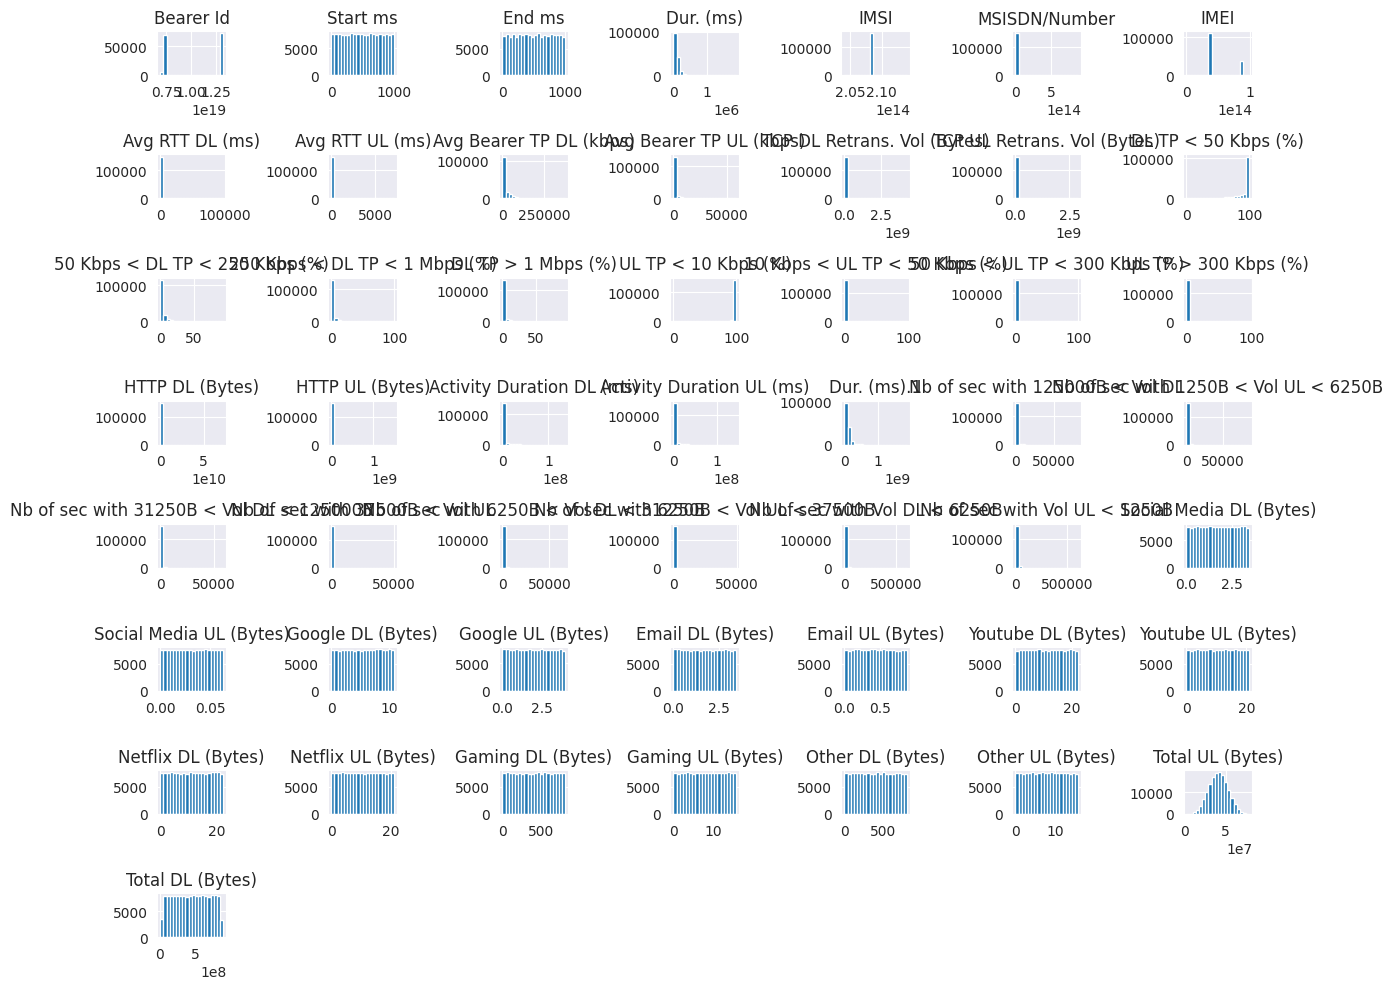

In [32]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

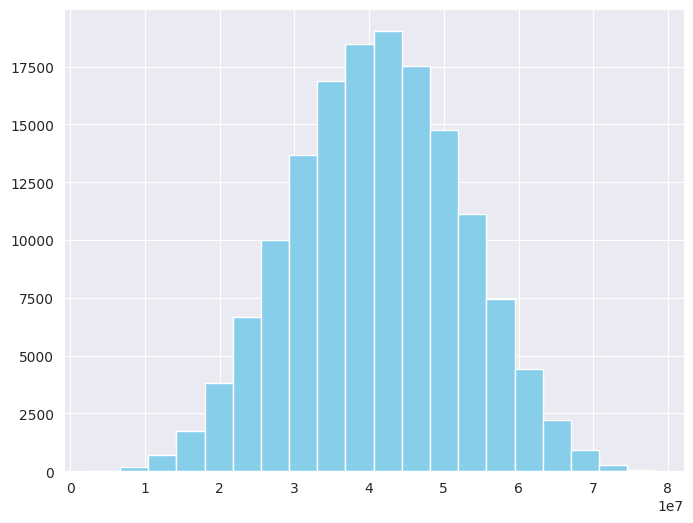

In [33]:
plt.figure(figsize=(8,6))
plt.hist(df['Total UL (Bytes)'], bins= 20, color='skyblue')
plt.show()

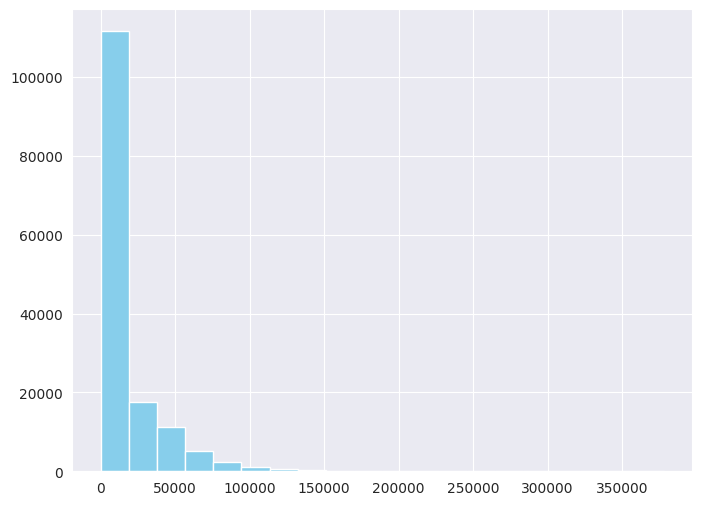

In [34]:
plt.figure(figsize=(8,6))
plt.hist(df['Avg Bearer TP DL (kbps)'], bins= 20, color='skyblue')
plt.show()

I am going to further examine these

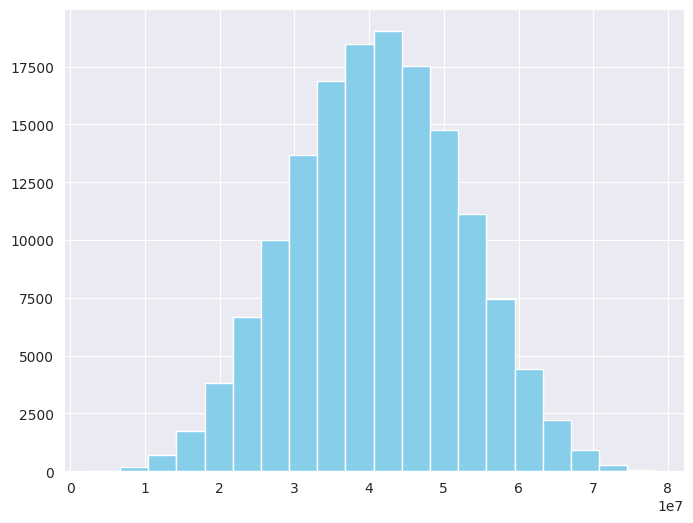

In [45]:
plt.figure(figsize=(8,6))
plt.hist(df['Total UL (Bytes)'], bins= 20, color='skyblue')
plt.show()

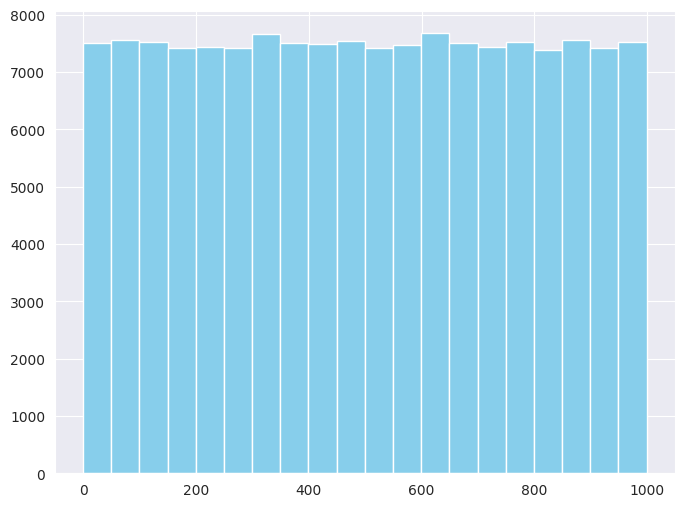

In [37]:
plt.figure(figsize=(8,6))
plt.hist(df['Start ms'], bins= 20, color='skyblue')
plt.show()

### Detect Outliers

I will now try to detect outliers automatically by setting a threshold. And automatically filtering out columns with outliers.

I will set the threshold to 3. Which means values which defer from the mean value by a standard deviation of 3 will be considered as outliers or anomaly.

In [38]:
threshold = 30

cols_with_outliers = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        mean = df[col].mean()
        std = df[col].std()
        outliers = df[(df[col] - mean).abs() > threshold * std]
        
        
        if len(outliers) > 0:
            cols_with_outliers.append(col)

In [39]:
print('Potential columns with outliers: ', cols_with_outliers)
print(len(cols_with_outliers))

Potential columns with outliers:  ['IMSI', 'MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration UL (ms)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']
20


Woops Looks like we have 31 columns with outliers. Lets try a different number

The lower the threshold the lower the chance of detecting outliers. So lets try a bigger number
With a standard deviation of 30 we have 20 columns. Let me try and plot some of the columns

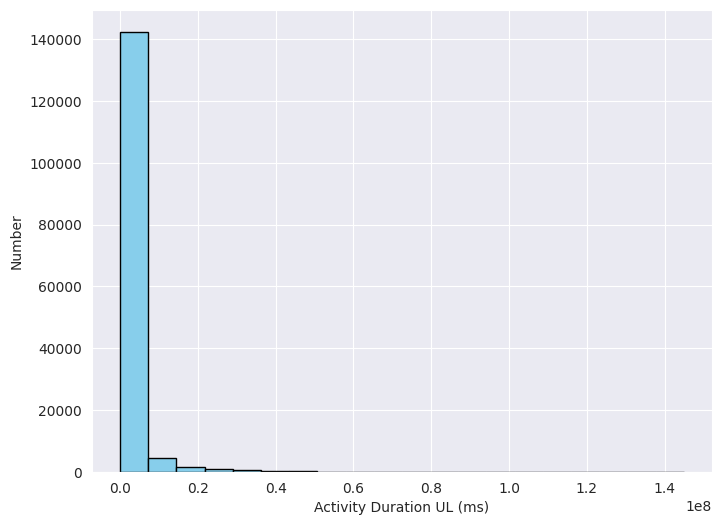

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.hist(df['Activity Duration UL (ms)'], bins = 20, color='skyblue', edgecolor='black')
plt.xlabel('Activity Duration UL (ms)')
plt.ylabel('Number')
plt.show()

In [41]:
df['Activity Duration UL (ms)'].describe()

count    1.500010e+05
mean     1.408880e+06
std      4.643215e+06
min      0.000000e+00
25%      2.154000e+04
50%      4.679400e+04
75%      5.991140e+05
max      1.449113e+08
Name: Activity Duration UL (ms), dtype: float64

Okay in this context
outliers are values that lie significantly beyond the range of the majority of the data.
The maximum value is much larger than the 75th percentile (third quartile), which indicates the presence of potential outliers.
In this case, values much larger than the upper quartile plus 1.5 times the interquartile range (IQR) are outliers.
SO we calculate the IQR as the difference between the 75th percentile (Q3) and the 25th percentile (Q1), then find the threshold for outliers as Q3 + 1.5 * IQR.

In [42]:
Q1 = df['Activity Duration UL (ms)'].quantile(0.25)
Q3 = df['Activity Duration UL (ms)'].quantile(0.75)

IQR = Q3 - Q1
upper_ts = Q3 + 1.5 * IQR

outliers_activity_duration = df[df['Activity Duration UL (ms)'] > upper_ts]
outliers_activity_duration

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
26,1.304243e+19,4/23/2019 16:15,403.0,4/25/2019 0:03,967.0,114435.0,2.082009e+14,3.378335e+10,8.653160e+13,L40494A,...,12.491927,16.659609,6.672406,11.450732,627.584222,1.856981,445.168194,13.323931,47257666.0,691535046.0
32,1.304243e+19,4/23/2019 16:31,869.0,4/25/2019 2:59,259.0,124083.0,2.082018e+14,3.366917e+10,3.566261e+13,L41432B,...,21.884084,9.234311,6.475683,16.785978,149.351976,1.413881,354.136843,9.019186,42171989.0,197307922.0
40,7.277826e+18,4/23/2019 17:03,327.0,4/25/2019 3:49,512.0,125184.0,2.082018e+14,3.365968e+10,3.534261e+13,D10163A,...,16.908526,19.908858,6.903154,20.899338,81.502107,11.929695,746.910082,11.384610,69577055.0,118337364.0
69,1.304243e+19,4/23/2019 18:17,261.0,4/25/2019 0:16,530.0,107948.0,2.082018e+14,3.365893e+10,8.637690e+13,D74292B,...,14.786238,2.689515,8.816801,1.474634,131.892910,14.443275,233.743974,13.955727,36873040.0,171228903.0
103,1.304243e+19,4/23/2019 19:46,648.0,4/25/2019 1:24,276.0,106636.0,2.082014e+14,3.366655e+10,3.534681e+13,T42168B,...,4.997142,10.735268,17.061292,16.638442,268.272932,4.854084,481.691023,11.489294,49027669.0,309686088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149957,7.277826e+18,4/23/2019 10:27,81.0,4/25/2019 1:01,647.0,138889.0,2.082003e+14,3.365033e+10,3.573301e+13,T96034B,...,20.649733,9.488531,22.136576,0.774940,498.963199,2.433647,52.274898,3.746940,19139132.0,580538212.0
149968,1.304243e+19,4/23/2019 11:02,331.0,4/25/2019 2:06,781.0,140628.0,2.082018e+14,3.366622e+10,8.637690e+13,T85775A,...,9.479422,1.231565,0.217541,13.230920,82.974601,15.782003,216.895780,11.990833,44721238.0,100994875.0
149987,1.304243e+19,4/23/2019 12:26,490.0,4/25/2019 1:53,949.0,134866.0,2.082010e+14,3.365849e+10,8.654080e+13,T88499A,...,18.254986,16.129050,5.251417,4.347292,679.699632,12.394625,788.456680,3.776839,42109333.0,751427016.0
149988,1.304243e+19,4/23/2019 12:27,507.0,4/25/2019 2:21,800.0,136420.0,2.082019e+14,3.366630e+10,8.637690e+13,T93113B,...,4.984733,13.135531,4.354425,14.872510,346.228920,8.350195,209.451590,9.389470,48813117.0,382007822.0


In [43]:
outliers_activity_duration['Activity Duration UL (ms)'].describe()

count    2.602200e+04
mean     7.372365e+06
std      8.991167e+06
min      1.465506e+06
25%      2.405877e+06
50%      4.104390e+06
75%      8.392083e+06
max      1.449113e+08
Name: Activity Duration UL (ms), dtype: float64

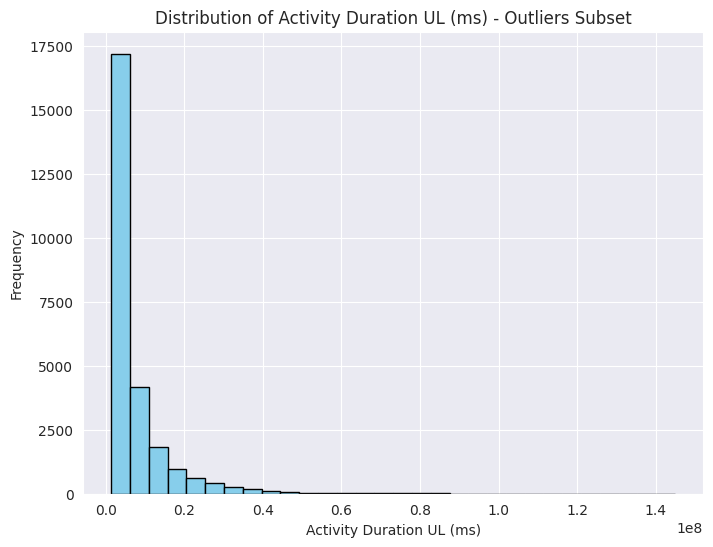

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(outliers_activity_duration['Activity Duration UL (ms)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Activity Duration UL (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Activity Duration UL (ms) - Outliers Subset')
plt.grid(True)
plt.show()